In [ ]:
#Create database sqlite3 task2.db
#Insert columns with headers from csv to user_activity table

import csv, sqlite3

con = sqlite3.connect('task2.db')

cur = con.cursor()

a_file = open("exp1.csv")
rows = csv.reader(a_file)
cur.executemany("INSERT INTO user_activity VALUES (?, ?, ?)", rows)

con.commit()
con.close()

In [7]:
#A-Test
import sqlite3

con = sqlite3.connect('task2.db')
cur = con.cursor()
users_in_cards_unique_A = cur.execute(""
  "SELECT count(distinct user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%A' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND url like '%/city/directory/%' ").fetchone()[0]

users_opened_contacts_unique_A = cur.execute(""
  "SELECT count(distinct user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%A' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND (url like '%/good/%/owner_info%' OR url like '%/bulletin/%/ajax_contact%') ").fetchone()[0]

print("users_opened_contacts_unique_A: ")
print(users_opened_contacts_unique_A)
print("users_in_cards_unique_A: ")
print(users_in_cards_unique_A)
print("unique user`s conversion from opened contacts from cards: ")
print(users_opened_contacts_unique_A*100/users_in_cards_unique_A)

users_in_cards_common_A = cur.execute(""
  "SELECT count(user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%A' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND url like '%/city/directory/%' ").fetchone()[0]

users_opened_contacts_common_A = cur.execute(""
  "SELECT count(user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%A' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND (url like '%/good/%/owner_info%' OR url like '%/bulletin/%/ajax_contact%') ").fetchone()[0]

print("users_opened_contacts_common_A: ")
print(users_opened_contacts_common_A)
print("users_in_cards_common_A: ")
print(users_in_cards_common_A)
print("conversion from opened contacts from cards: ")
print(users_opened_contacts_common_A*100/users_in_cards_common_A)

con.commit()
con.close()

# users_opened_contacts_unique_A:
# 127
# users_in_cards_unique_A:
# 1222
# unique user`s conversion from opened contacts from cards:
# 10.39279869067103
# users_opened_contacts_common_A:
# 972
# users_in_cards_common_A:
# 67314
# conversion from opened contacts from cards:
# 1.443978964257064

users_opened_contacts_unique_A: 
127
users_in_cards_unique_A: 
1222
unique user`s conversion from opened contacts from cards: 
10.39279869067103
users_opened_contacts_common_A: 
972
users_in_cards_common_A: 
67314
conversion from opened contacts from cards: 
1.443978964257064


users_opened_contacts_unique_B: 
125
users_in_cards_unique_B: 
1076
unique user`s conversion from opened contacts from cards: 
11.617100371747211
users_opened_contacts_common_B: 
849
users_in_cards_common_B: 
57984
conversion from opened contacts from cards: 
1.4641970198675496
Test option B lift Conversion Rates by 14.47% with 55.7% probability.


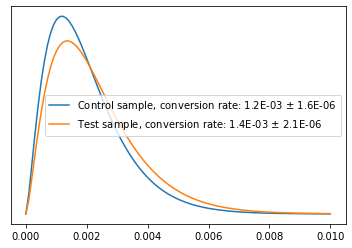

In [8]:
#B-test
import sqlite3

con = sqlite3.connect('task2.db')
cur = con.cursor()
users_in_cards_unique_B = cur.execute(""
  "SELECT count(distinct user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%B' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND url like '%/city/directory/%' ").fetchone()[0]

users_opened_contacts_unique_B = cur.execute(""
  "SELECT count(distinct user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%B' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND (url like '%/good/%/owner_info%' OR url like '%/bulletin/%/ajax_contact%') ").fetchone()[0]

print("users_opened_contacts_unique_B: ")
print(users_opened_contacts_unique_B)
print("users_in_cards_unique_B: ")
print(users_in_cards_unique_B)
print("unique user`s conversion from opened contacts from cards: ")
print(users_opened_contacts_unique_B*100/users_in_cards_unique_B)

users_in_cards_common_B = cur.execute(""
  "SELECT count(user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%B' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND url like '%/city/directory/%' ").fetchone()[0]

users_opened_contacts_common_B = cur.execute(""
  "SELECT count(user_id) as users_in_cards_unique "
  "FROM user_activity WHERE "
  "user_id like '%B' AND "
  "strftime('%Y-%m-%d', date) BETWEEN \"2017-10-10\" AND \"2017-11-01\" "
  "AND (url like '%/good/%/owner_info%' OR url like '%/bulletin/%/ajax_contact%') ").fetchone()[0]

print("users_opened_contacts_common_B: ")
print(users_opened_contacts_common_B)
print("users_in_cards_common_B: ")
print(users_in_cards_common_B)
print("conversion from opened contacts from cards: ")
print(users_opened_contacts_common_B*100/users_in_cards_common_B)

con.commit()
con.close()

# users_opened_contacts_unique_B:
# 125
# users_in_cards_unique_B:
# 1076
# unique user`s conversion from opened contacts from cards:
# 11.617100371747211
# users_opened_contacts_common_B:
# 849
# users_in_cards_common_B:
# 57984
# conversion from opened contacts from cards:
# 1.4641970198675496

from math import lgamma
from numba import jit
import numpy
from scipy import stats

import matplotlib.pyplot as plt


imps_ctrl,convs_ctrl=1222, 1.44
imps_test, convs_test=1076, 1.46

#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
beta_C = stats.beta(a_C, b_C)
a_T, b_T = convs_test+1, imps_test-convs_test+1
beta_T = stats.beta(a_T, b_T)

#calculating the lift
lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()

#calculating the probability for Test to be better than Control

def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return numpy.exp(num - den)

def g0(a, b, c):
    return numpy.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d

def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))

def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])
prob=calc_prob_between(beta_T, beta_C)

print (f"Test B lift Conversion Rates by {lift*100:2.2f}% with {prob*100:2.1f}% probability on a test A.")
def calc_beta_mode(a, b):
    '''this function calculate the mode (peak) of the Beta distribution'''
    return (a-1)/(a+b-2)

def plot(betas, names, linf=0, lsup=0.01):
    '''this function plots the Beta distribution'''
    x=numpy.linspace(linf,lsup, 100)
    for f, name in zip(betas,names) :
        y=f.pdf(x) #this for calculate the value for the PDF at the specified x-points
        y_mode=calc_beta_mode(f.args[0], f.args[1])
        y_var=f.var() # the variance of the Beta distribution
        plt.plot(x,y, label=f"{name} sample, conversion rate: {y_mode:0.1E} $\pm$ {y_var:0.1E}")
        plt.yticks([])
    plt.legend()
    plt.show()

plot([beta_C, beta_T], names=["Control", "Test"])

2